In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Load dataset
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# models training without scale numerical
# Dictionary to store accuracies
accuracies = {}

models = {
    'GradientBoostingRegressor' : GradientBoostingRegressor(n_estimators=500),
    'LightGBM':  lgb.LGBMRegressor(random_state=42),
    'XGBoost' : xgb.XGBRegressor(objective='reg:squarederror', missing=np.nan, random_state=42),
    'CatBoost' : cb.CatBoostRegressor(random_state=42, verbose=0),
    'LinearRegression' : LinearRegression(),
    'DecisionTree' : DecisionTreeRegressor()
}

max_accuracy_name = ""
max_accuracy = 0
max_acc_model = None

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'{name} RMSE: {rmse:.2f}')
    accuracies[name] = rmse
    
    if rmse > max_accuracy:
        max_accuracy_name = name
        max_accuracy = rmse
        max_acc_model = model
        
    print("="*80)

Training GradientBoostingRegressor...


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


GradientBoostingRegressor RMSE: 0.48
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 14448, number of used features: 8
[LightGBM] [Info] Start training from score 2.069240


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LightGBM RMSE: 0.46
Training XGBoost...


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost RMSE: 0.46
Training CatBoost...


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CatBoost RMSE: 0.44
Training LinearRegression...
LinearRegression RMSE: 0.73
Training DecisionTree...
DecisionTree RMSE: 0.73


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


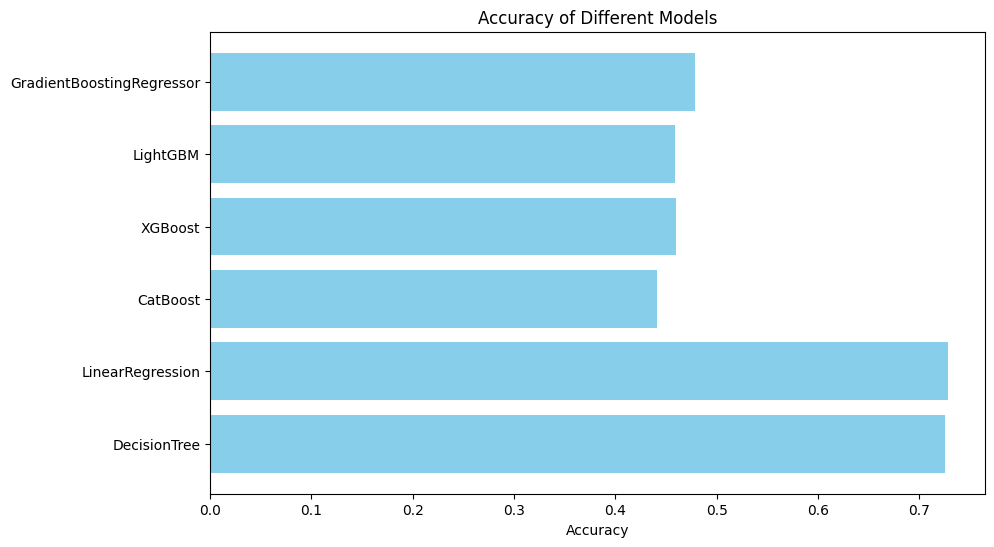

In [7]:
# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, )
plt.gca().invert_yaxis() 
plt.show()

In [8]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# models training without scale numerical
# Dictionary to store accuracies
accuracies = {}

models = {
    'LightGBM':  lgb.LGBMRegressor(random_state=42),
    'XGBoost' : xgb.XGBRegressor(objective='reg:squarederror', missing=np.nan, random_state=42),
    'CatBoost' : cb.CatBoostRegressor(random_state=42, verbose=0),
    'LinearRegression' : LinearRegression(),
    'DecisionTree' : DecisionTreeRegressor()
}

max_accuracy_name = ""
max_accuracy = 0
max_acc_model = None

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'{name} RMSE: {rmse:.2f}')
    accuracies[name] = rmse
    
    if rmse > max_accuracy:
        max_accuracy_name = name
        max_accuracy = rmse
        max_acc_model = model
        
    print("="*80)

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 14448, number of used features: 8
[LightGBM] [Info] Start training from score 2.069240


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LightGBM RMSE: 2.46
Training XGBoost...


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost RMSE: 2.02
Training CatBoost...


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CatBoost RMSE: 1.81
Training LinearRegression...
LinearRegression RMSE: 76.23
Training DecisionTree...
DecisionTree RMSE: 1.82


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


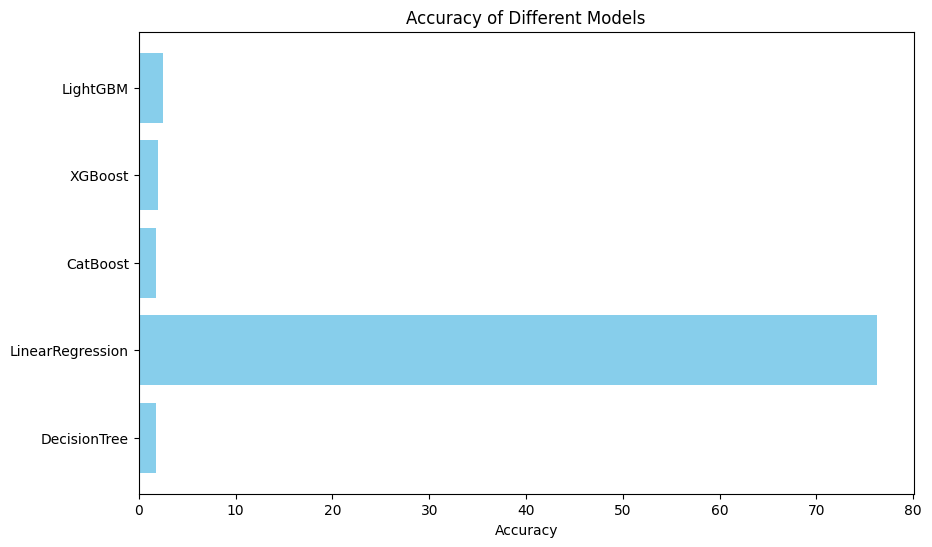

In [10]:
# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, )
plt.gca().invert_yaxis() 
plt.show()